# <center>B-boson photoproduction code tutorial</center>

## <center>Created by: Sean Tulin</center>

This notebook explains the code from [Ben Othman, Jalooli, & Tulin (2023)](https://arxiv.org) and [this repository](https://github.com/dark-physics/baryonic-dark-forces) for calculating the photoproduction cross sections for B bosons, as well as omega and phi mesons within a phenomenological model.

Note that the units for cross section is in microbarns and all other quantities have units in GeV. The B-boson cross sections are all normalized to $\alpha_B = 1$ and scale linearly with $\alpha_B$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Import code
from photoproductionmodel import *

# Import model parameters (1000 realizations)
chain = np.load("chain.npy")

## Differential cross sections

Differential cross sections for photoproduction can be calculated with respect to $t$ or $\cos\theta$ (CM frame scattering angle).

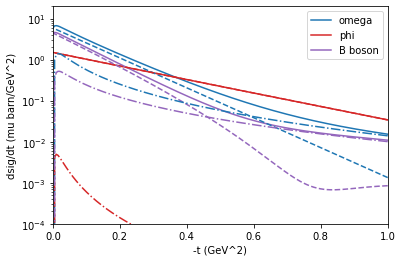

In [2]:
t = np.linspace(-1,0,num=200)
W = 5 # center-of-mass energy
mB = 0.6 # B-boson mass

# Take one parameter point (last one)
params = chain[-1]

# Solid lines are total cross section
plt.plot(-t,dsig_dt_omega(W,t,params),label='omega',color='tab:blue')
plt.plot(-t,dsig_dt_phi(W,t,params),label='phi',color='tab:red')
plt.plot(-t,dsig_dt_B(W,t,params,mB),label='B boson',color='tab:purple')

# Dashed lines are positive-parity cross section (Pomeron-exchange)
plt.plot(-t,dsig_dt_omega_plus(W,t,params),color='tab:blue',linestyle='--')
plt.plot(-t,dsig_dt_phi_plus(W,t,params),color='tab:red',linestyle='--')
plt.plot(-t,dsig_dt_B_plus(W,t,params,mB),color='tab:purple',linestyle='--')

# Dash-dotted lines are negative-parity cross section (pseudoscalar-exchange)
plt.plot(-t,dsig_dt_omega_minus(W,t,params),color='tab:blue',linestyle='-.')
plt.plot(-t,dsig_dt_phi_minus(W,t,params),color='tab:red',linestyle='-.')
plt.plot(-t,dsig_dt_B_minus(W,t,params,mB),color='tab:purple',linestyle='-.')

plt.yscale('log')
plt.xlabel('-t (GeV^2)')
plt.ylabel('dsig/dt (mu barn/GeV^2)')

plt.xlim([0,1])
plt.ylim([1e-4,20])

plt.legend()
plt.show()

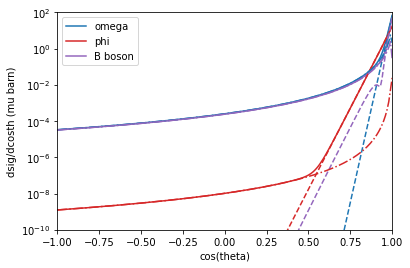

In [3]:
costh = np.linspace(-1,1,num=200)
W = 5

# Take one parameter point (last one)
params = chain[-1]

# Solid lines are total cross section
plt.plot(costh,dsig_dcosth_omega(W,costh,params),label='omega',color='tab:blue')
plt.plot(costh,dsig_dcosth_phi(W,costh,params),label='phi',color='tab:red')
plt.plot(costh,dsig_dcosth_B(W,costh,params,mB),label='B boson',color='tab:purple')

# Dashed lines are positive-parity cross section (Pomeron-exchange)
plt.plot(costh,dsig_dcosth_omega_plus(W,costh,params),color='tab:blue',linestyle='--')
plt.plot(costh,dsig_dcosth_phi_plus(W,costh,params),color='tab:red',linestyle='--')
plt.plot(costh,dsig_dcosth_B_plus(W,costh,params,mB),color='tab:purple',linestyle='--')

# Dash-dotted lines are negative-parity cross section (pseudoscalar-exchange)
plt.plot(costh,dsig_dcosth_omega_minus(W,costh,params),color='tab:blue',linestyle='-.')
plt.plot(costh,dsig_dcosth_phi_minus(W,costh,params),color='tab:red',linestyle='-.')
plt.plot(costh,dsig_dcosth_B_minus(W,costh,params,mB),color='tab:purple',linestyle='-.')

plt.yscale('log')
plt.xlabel('cos(theta)')
plt.ylabel('dsig/dcosth (mu barn)')

plt.xlim([-1,1])
plt.ylim([1e-10,100])

plt.legend()
plt.show()

## Differential cross sections for virtual photoproduction

The solid line is for on-shell photons. Dashed and dotted lines are for different values of $Q^2$. Purple lines are for the transverse cross section, orange is for the longitudinal cross section.

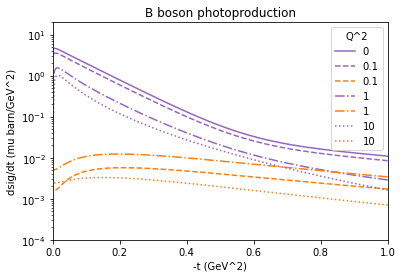

In [4]:
t = np.linspace(-1,0,num=200)
W = 5 # center-of-mass energy
mB = 0.6 # B-boson mass

# Take one parameter point (last one)
params = chain[-1]

plt.plot(-t,dsig_dt_B(W,t,params,mB),label='0',color='tab:purple')

Q2 = 0.1
plt.plot(-t,dsigT_dt_B(W,t,Q2,params,mB),label=str(Q2),color='tab:purple',linestyle='--')
plt.plot(-t,dsigL_dt_B(W,t,Q2,params,mB),label=str(Q2),color='tab:orange',linestyle='--')

Q2 = 1
plt.plot(-t,dsigT_dt_B(W,t,Q2,params,mB),label=str(Q2),color='tab:purple',linestyle='-.')
plt.plot(-t,dsigL_dt_B(W,t,Q2,params,mB),label=str(Q2),color='tab:orange',linestyle='-.')

Q2 = 10
plt.plot(-t,dsigT_dt_B(W,t,Q2,params,mB),label=str(Q2),color='tab:purple',linestyle='dotted')
plt.plot(-t,dsigL_dt_B(W,t,Q2,params,mB),label=str(Q2),color='tab:orange',linestyle='dotted')

plt.yscale('log')
plt.xlabel('-t (GeV^2)')
plt.ylabel('dsig/dt (mu barn/GeV^2)')

plt.xlim([0,1])
plt.ylim([1e-4,20])

plt.title('B boson photoproduction')
plt.legend(title='Q^2')
plt.show()

## Total photoproduction cross sections

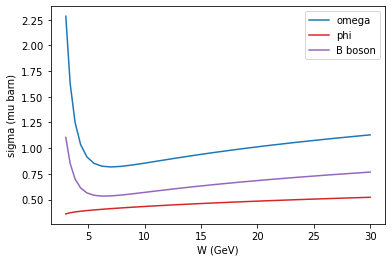

In [5]:
W = np.geomspace(3,30,num=20)
mB = 0.6

plt.plot(W,sig_omega(W,params),label='omega',color='tab:blue')
plt.plot(W,sig_phi(W,params),label='phi',color='tab:red')
plt.plot(W,sig_B(W,mB,params),label='B boson',color='tab:purple')

plt.xlabel('W (GeV)')
plt.ylabel('sigma (mu barn)')

plt.legend()
plt.show()

## Total cross sections for virtual photoproduction

The solid line is for on-shell photons. Dashed and dotted lines are for different values of $Q^2$. Purple lines are for the transverse cross section, orange is for the longitudinal cross section.

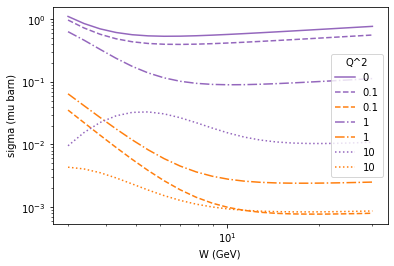

In [6]:
W = np.geomspace(3,30,num=20)
mB = 0.6

plt.plot(W,sig_B(W,mB,params),label='0',color='tab:purple')

Q2 = 0.1
plt.plot(W,sigT_B(W,Q2,mB,params),label=str(Q2),color='tab:purple',linestyle='--')
plt.plot(W,sigL_B(W,Q2,mB,params),label=str(Q2),color='tab:orange',linestyle='--')

Q2 = 1
plt.plot(W,sigT_B(W,Q2,mB,params),label=str(Q2),color='tab:purple',linestyle='-.')
plt.plot(W,sigL_B(W,Q2,mB,params),label=str(Q2),color='tab:orange',linestyle='-.')

Q2 = 10
plt.plot(W,sigT_B(W,Q2,mB,params),label=str(Q2),color='tab:purple',linestyle='dotted')
plt.plot(W,sigL_B(W,Q2,mB,params),label=str(Q2),color='tab:orange',linestyle='dotted')

plt.xlabel('W (GeV)')
plt.ylabel('sigma (mu barn)')

plt.xscale('log')
plt.yscale('log')

plt.legend(title='Q^2')
plt.show()